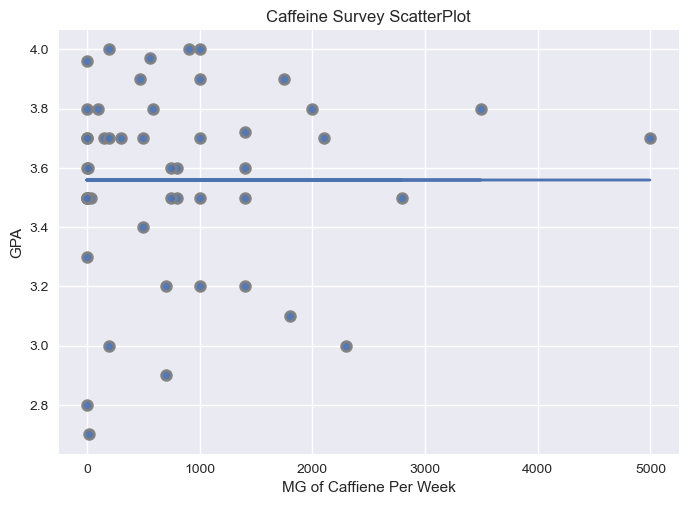

ANOVA Table:
            df    sum_sq   mean_sq        F   PR(>F)
mg         1.0  0.022634  0.022634  0.21976  0.64139
Residual  47.0  4.840664  0.102993      NaN      NaN
-------------------------------------------------------------------------
OLS Regression Results:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2198
Date:                Wed, 12 Apr 2023   Prob (F-statistic):              0.641
Time:                        19:33:28   Log-Likelihood:                -12.816
No. Observations:                  49   AIC:                             29.63
Df Residuals:                      47   BIC:                             33.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5422      0.060     59.274      0.000       3.422       3.662
mg          2.143e-05   4.57e-05      0.469      0.641   -7.05e-05       0.000
==============================================================================
Omnibus:                        6.937   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.318
Skew:                          -0.871   Prob(JB):                       0.0425
Kurtosis:                       3.242   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import statsmodels.api as sm

# reading the database
Datas = pd.read_csv('CaffeineSurvey.csv')
Mg=Datas['mg']
GPA=Datas['GPA']
Sleep=Datas['Sleep hrs/day']
Productivity=Datas['Productivity /5']
Stress=Datas['Stress /5']

# Scatter plot with day against tip
plt.scatter(Datas['mg'], Datas['GPA'],edgecolors='Gray',linewidths=2,alpha=0.95)
plt.style.use('seaborn')
 
# Adding Title to the Plot
plt.title("Caffeine Survey ScatterPlot")
 
# Setting the X and Y labels
plt.xlabel('MG of Caffiene Per Week')
plt.ylabel('GPA')
 
z=np.polyfit(Mg,GPA,0.01)
p=np.poly1d(z)
plt.plot(Mg,p(GPA))

plt.show()

my_model = smf.ols(formula='GPA ~ mg', data=Datas)

# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()

# print summary of linear regression
#print(my_model_fit.summary())
# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=1)
print("ANOVA Table:")
print(anova_table)
print("-------------------------------------------------------------------------")



# Adding a constant to get an intercept
#X_train_sm = sm.add_constant(X_train)
X_train_sm = sm.add_constant(Mg)
# Fitting the resgression line using 'OLS'
lr = sm.OLS(GPA, X_train_sm).fit()

# Printing the parameters
print("OLS Regression Results:")
lr.summary()







In [3]:
Datas.describe()

,mg,GPA,Sleep hrs/day,Productivity /5,Stress /5
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,838.693878,3.560204,6.193878,3.653061,3.489796
std,1013.469355,0.318306,1.198160,0.963955,1.401226
min,0.000000,2.700000,4.000000,1.000000,0.500000
25%,20.000000,3.500000,5.500000,3.000000,2.500000
50%,585.000000,3.600000,6.000000,4.000000,4.000000
75%,1000.000000,3.800000,7.000000,4.500000,5.000000
max,5000.000000,4.000000,9.000000,5.000000,5.000000
